In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [44]:
link_url = https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset/

SyntaxError: ignored

In [49]:
path = '/content/drive/MyDrive/global/heart.csv'

In [46]:
# Para trabalhar com dados em tabelas
import pandas as pd

# Para trabalhar com dados do OpenML
from sklearn.datasets import fetch_openml

# Para trabalhar com gráficos
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
dados = pd.read_csv(path)

In [52]:
dados.head


<bound method NDFrame.head of      age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  outp

# ANÁLISE ESTÁTISTICA EXPLORATÓRIA

In [53]:
dados["age"].mean(), dados["sex"].mean()

(54.366336633663366, 0.6831683168316832)

In [54]:
dados["age"].median(), dados["sex"].median()

(55.0, 1.0)

# 5 GRÁFICOS DISTINTOS


Text(0, 0.5, 'Pressão Arterial')

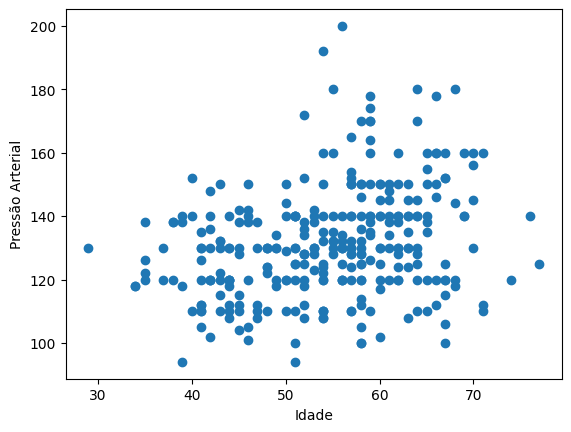

In [55]:
plt.scatter(x = dados['age'], y = dados['trtbps'])
plt.xlabel('Idade')
plt.ylabel('Pressão Arterial')

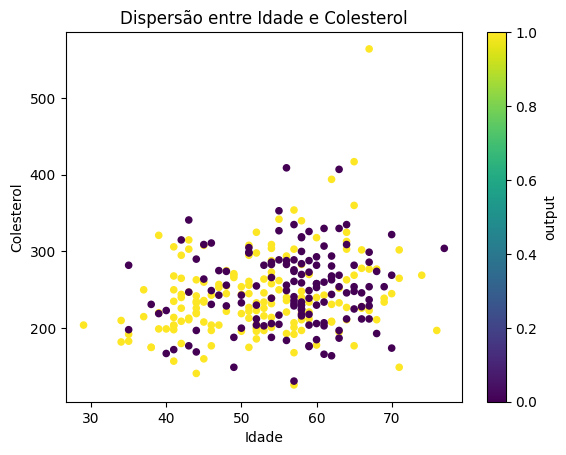

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(path)

df.plot.scatter(x='age', y='chol', c='output', colormap='viridis')
plt.title('Dispersão entre Idade e Colesterol')
plt.xlabel('Idade')
plt.ylabel('Colesterol')
plt.show()

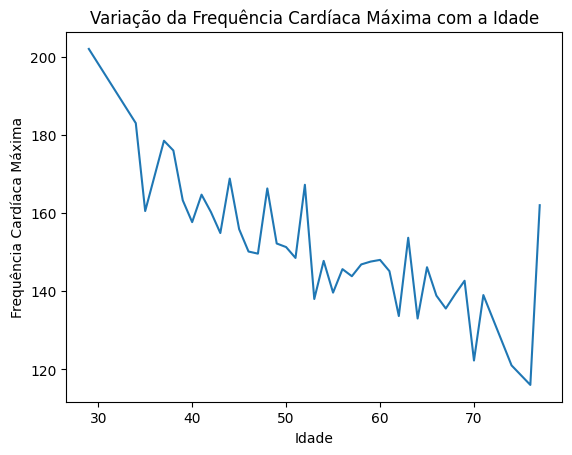

In [57]:
df.groupby('age')['thalachh'].mean().plot(kind='line')
plt.title('Variação da Frequência Cardíaca Máxima com a Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência Cardíaca Máxima')
plt.show()

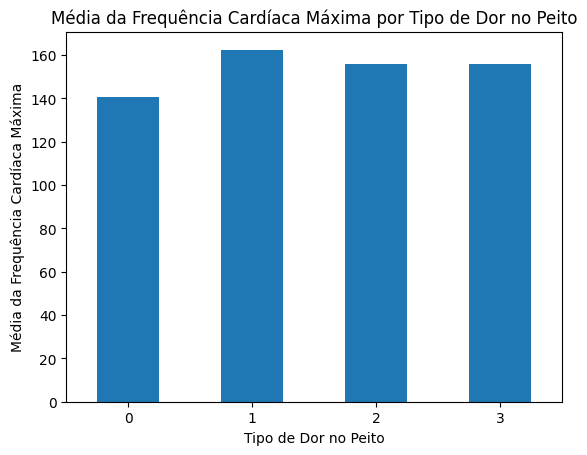

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df.groupby('cp')['thalachh'].mean().plot(kind='bar', rot=0)
plt.title('Média da Frequência Cardíaca Máxima por Tipo de Dor no Peito')
plt.xlabel('Tipo de Dor no Peito')
plt.ylabel('Média da Frequência Cardíaca Máxima')
plt.show()

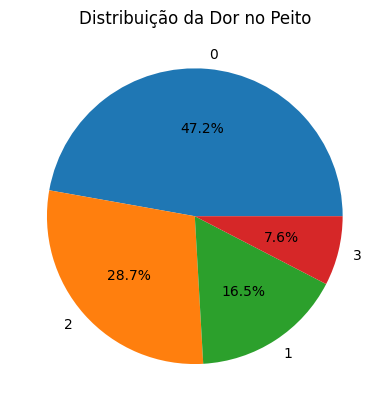

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df['cp'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribuição da Dor no Peito')
plt.ylabel('')
plt.show()

# TREINO DO MODELO 1

In [28]:
from sklearn.model_selection import train_test_split

In [101]:
# Escolhendo as colunas preditivas e alvo
x = dados.drop(columns = 'output') # Somente Comprimento do
                                    # Abdômen e Comprimento das Antenas
y = dados['output']                # Classe alvo

# Dividindo conjunto de treinamento e conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size = 0.2, random_state = 42)

In [59]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: output, Length: 61, dtype: int64

In [60]:
x_train.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3


In [61]:
y_train.head(5)

132    1
202    0
196    0
75     1
176    0
Name: output, dtype: int64

In [33]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [62]:
lda = LinearDiscriminantAnalysis()  # Criamos o objeto do classificador (não mudamos nenhum hiperpârametro)

lda.fit(x_train,y_train) # Treinamos o classificador passando apenas o conjunto de dados de treinamento

LinearDiscriminantAnalysis()

In [66]:
# Perceba que estamos passando apenas o x de teste,
# afinal o algoritmo é que nos dira qual é o y
y_predicoes = lda.predict(x_test)

In [67]:
y_predicoes

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay#, plot_confusion_matrix
from sklearn.metrics import (f1_score
                             , accuracy_score
                             , precision_score
                             , recall_score
                             , classification_report)

In [68]:
matriz_confusao = confusion_matrix(y_true = y_test,
                                   y_pred = y_predicoes,
                                   labels=[0, 1])

<Figure size 1500x500 with 0 Axes>

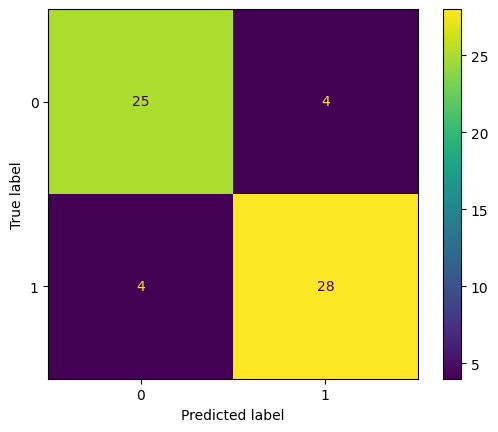

In [69]:
# plotando uma figura com a matriz de confusao
figure = plt.figure(figsize=(15, 5))
disp = ConfusionMatrixDisplay(
    confusion_matrix = matriz_confusao
    , display_labels=[0, 1])

disp.plot(values_format='d')

In [70]:
accuracy_score(y_true = y_test, y_pred = y_predicoes)

0.8688524590163934

In [71]:
precision_score(y_true = y_test,
         y_pred = y_predicoes,
         pos_label= 1)

0.875

In [72]:
recall_score(y_true = y_test,
         y_pred = y_predicoes,
         pos_label=1 )

0.875

In [73]:
f1_score(y_true = y_test,
         y_pred = y_predicoes,
         pos_label= 1)

0.875

In [74]:
print(classification_report(y_test, y_predicoes))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



# TREINO MODELO 2

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import (f1_score, accuracy_score, precision_score, recall_score, classification_report)

In [76]:
x = dados.drop(columns = 'fbs')
y = dados['fbs']

In [77]:
x_train, x_test, y_train, y_test = train_test_split(
x, y, test_size = 0.2, random_state = 42)

In [78]:
x_train.head(5)

y_train.head(5)

132    0
202    0
196    0
75     0
176    1
Name: fbs, dtype: int64

In [79]:
lda = LinearDiscriminantAnalysis()

lda.fit(x_train,y_train)

LinearDiscriminantAnalysis()

In [80]:
y_predicoes = lda.predict(x_test)
y_predicoes

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [81]:
matriz_confusao = confusion_matrix(y_true = y_test,
                                   y_pred = y_predicoes,
                                   labels=[0,1])

print(matriz_confusao)

[[44  3]
 [14  0]]


<Figure size 1500x500 with 0 Axes>

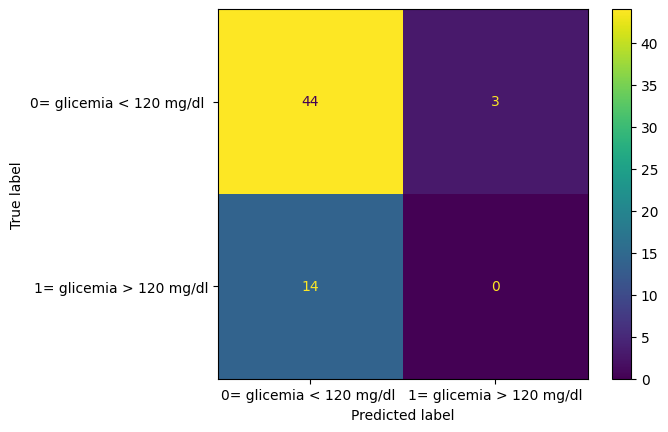

In [82]:
figure = plt.figure(figsize=(15, 5))
disp = ConfusionMatrixDisplay(
    confusion_matrix = matriz_confusao
    , display_labels=['0= glicemia < 120 mg/dl ','1= glicemia > 120 mg/dl'])

disp.plot(values_format='d')

In [83]:
accuracy_score(y_true = y_test, y_pred = y_predicoes)


0.7213114754098361

In [84]:
precision_score(y_true = y_test,
         y_pred = y_predicoes,
         pos_label=0)

0.7586206896551724

In [85]:
precision_score(y_true = y_test,
         y_pred = y_predicoes,
         pos_label=1)

0.0

In [86]:
recall_score(y_true = y_test,
         y_pred = y_predicoes,
         pos_label=0)

0.9361702127659575

In [88]:
recall_score(y_true = y_test,
         y_pred = y_predicoes,
         pos_label=1)

0.0

In [87]:
f1_score(y_true = y_test,
         y_pred = y_predicoes,
         pos_label=0)

0.8380952380952381

In [89]:
f1_score(y_true = y_test,
         y_pred = y_predicoes,
         pos_label=1)

0.0

In [90]:
print(classification_report(y_test, y_predicoes))

              precision    recall  f1-score   support

           0       0.76      0.94      0.84        47
           1       0.00      0.00      0.00        14

    accuracy                           0.72        61
   macro avg       0.38      0.47      0.42        61
weighted avg       0.58      0.72      0.65        61



# Método 1 : Modelo RandomForest


In [91]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.94      0.84        47
           1       0.00      0.00      0.00        14

    accuracy                           0.72        61
   macro avg       0.38      0.47      0.42        61
weighted avg       0.58      0.72      0.65        61



# Método 2 : Classificação com Support Vector Machine (SVM):


In [92]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

model = SVC(kernel='linear')

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87        47
           1       0.00      0.00      0.00        14

    accuracy                           0.77        61
   macro avg       0.39      0.50      0.44        61
weighted avg       0.59      0.77      0.67        61



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Método 3 : Modelo Regressão Logística


In [103]:
from sklearn.linear_model import LogisticRegression


logreg = LogisticRegression()
logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Importando pra JSON







In [ ]:
import pickle

In [96]:
with open('meu_modelo.serializado.pickle', 'wb') as f:
  pickle.dump(logreg, f)

In [97]:
with open('meu_modelo.serializado.pickle', 'rb') as f:
  modelo_carregado = pickle.load(f)

In [106]:
modelo_carregado.predict([[1,2,3,4,5,6,7,8,9,10,11,12,13]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

#Instruções


Url com parametros para ser usado no Servidor Flask:

/prever?1=63&2=1&3=3&4=145&5=233&6=1&7=0&8=150&9=0&10=2.3&11=0&12=0&13=1
